In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('Health_Insurance.xlsm')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
print("\nData types:\n", df.dtypes)


Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [8]:
# Summary Statistic
print("\nNumeric Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include=['object']))


Numeric Summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Categorical Summary:
          sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


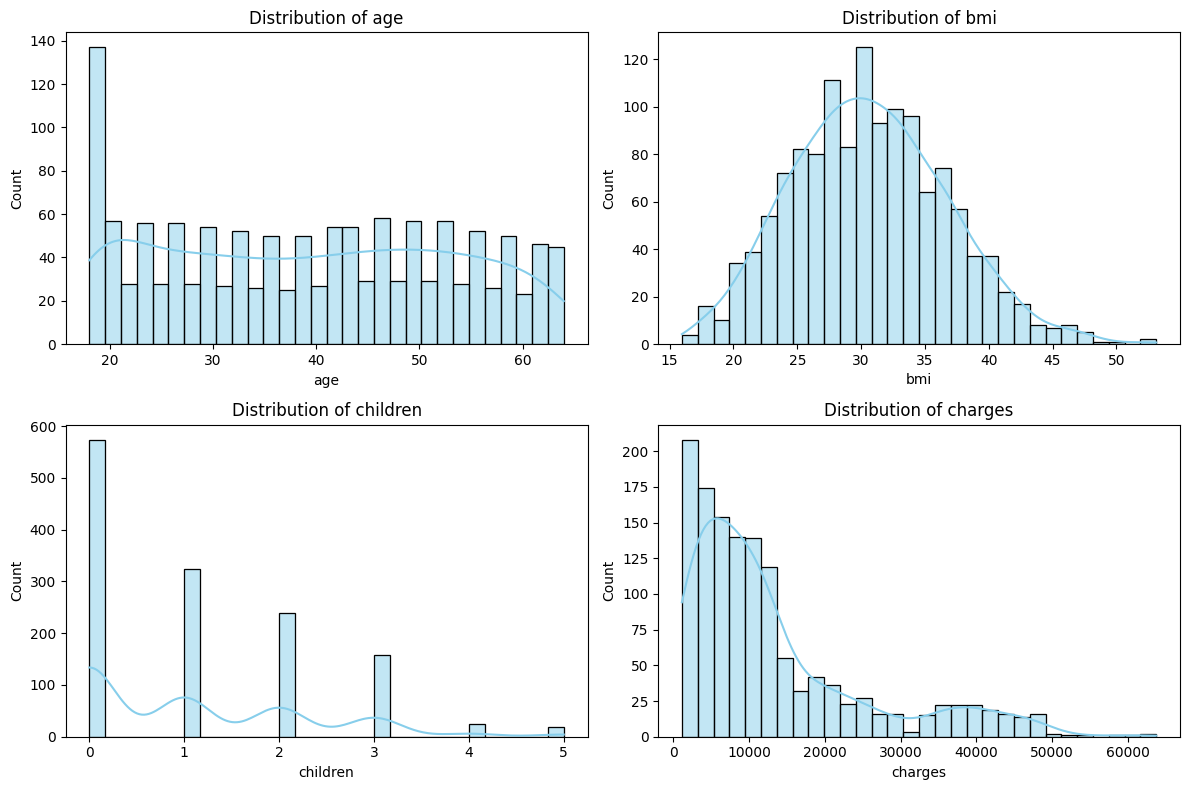

In [9]:
#Distribution of Features
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14580\960040614.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_14580\960040614.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_14580\960040614.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


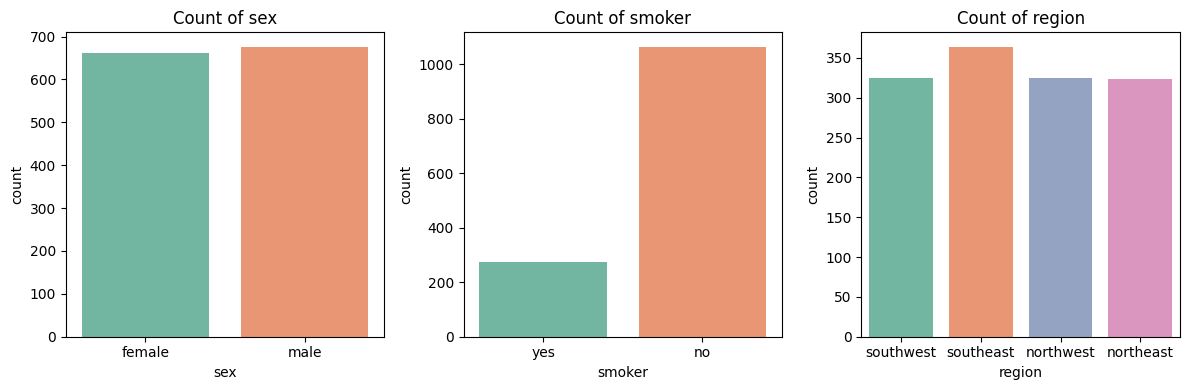

In [10]:
# Categorical Feature Counts
cat_cols = ["sex", "smoker", "region"]

plt.figure(figsize=(12,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

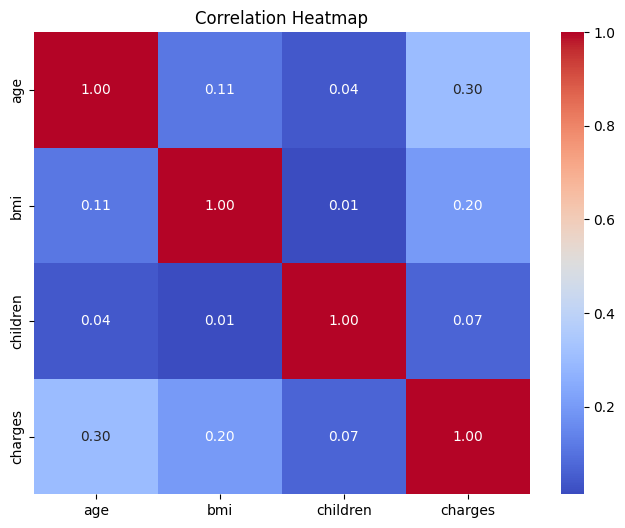

In [11]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14580\1145498473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoker", y="charges", palette="Set1")
C:\Users\User\AppData\Local\Temp\ipykernel_14580\1145498473.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="charges", palette="Set2")


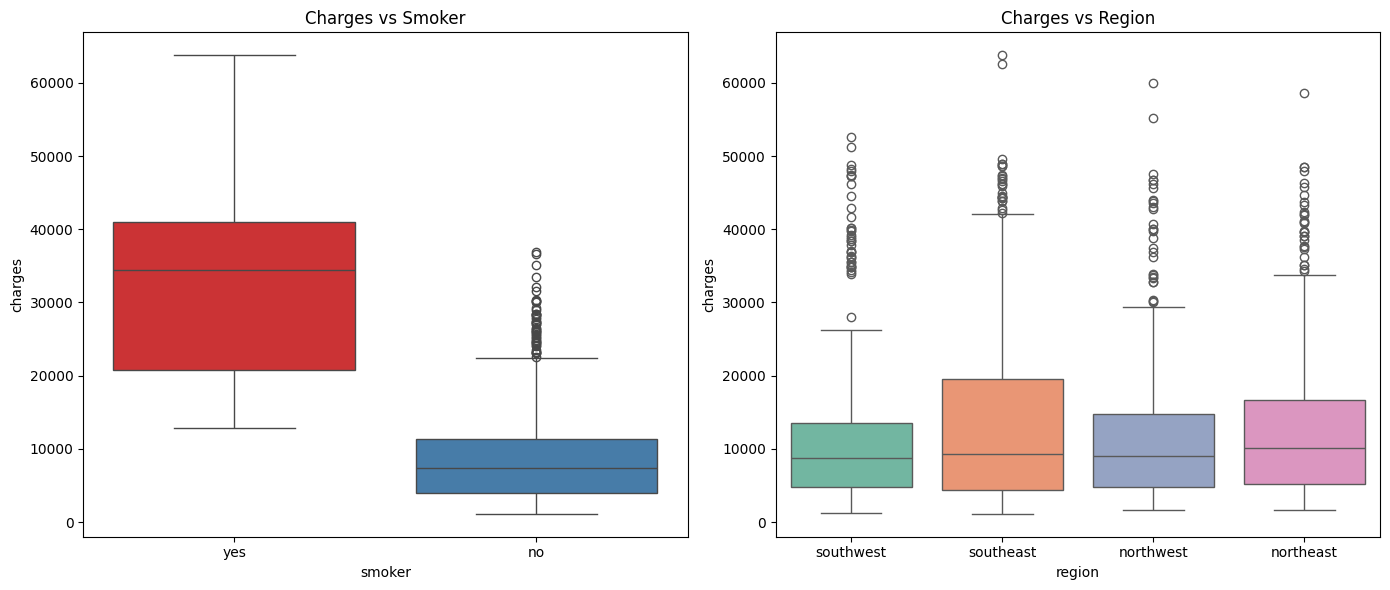

In [12]:
#Boxplots (Target vs Categorical)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="smoker", y="charges", palette="Set1")
plt.title("Charges vs Smoker")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="region", y="charges", palette="Set2")
plt.title("Charges vs Region")

plt.tight_layout()
plt.show()

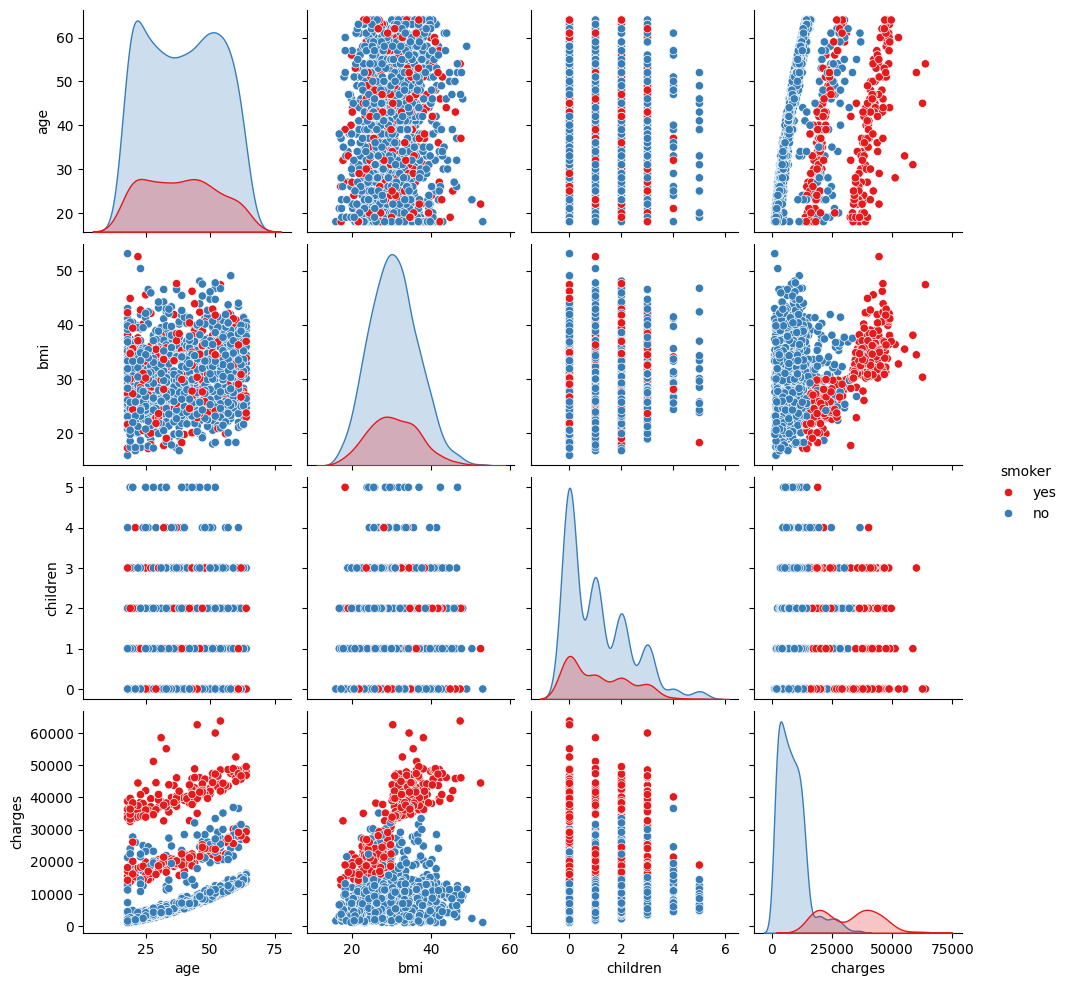

In [13]:
#Pairplot (Quick Relationships)
sns.pairplot(df[["age","bmi","children","charges","smoker"]], 
             hue="smoker", palette="Set1")
plt.show()


In [14]:
# Missing Values Check & Treatment
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



Column: bmi
Outliers count: 9
Lower Bound: 13.7, Upper Bound: 47.290000000000006


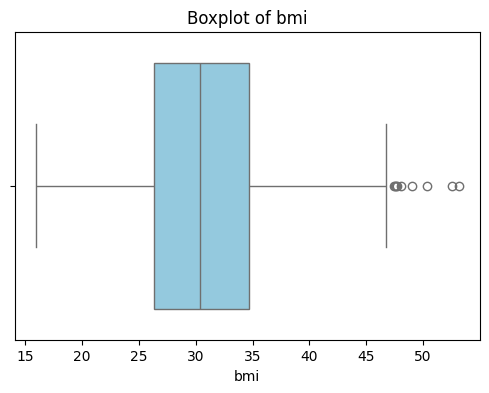


Column: charges
Outliers count: 139
Lower Bound: -13109.1508975, Upper Bound: 34489.350562499996


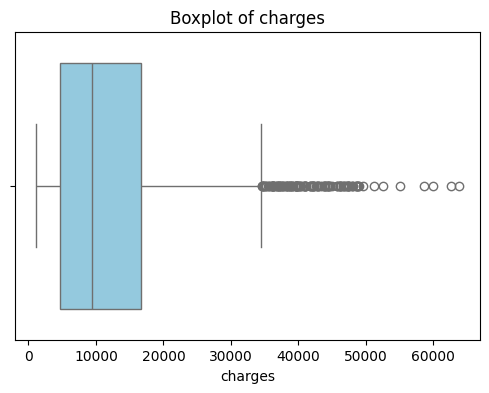

In [15]:
# Outlier Detection & Treatment
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

# Check outliers in BMI and Charges 
for col in ["bmi", "charges"]:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Outliers count: {outliers.shape[0]}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")

    # Visualize boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
#Treat Outliers 
for col in ["bmi", "charges"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap the outliers instead of removing
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("\n Outliers treated (capped using IQR method).")


 Outliers treated (capped using IQR method).


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encode Categorical Variables
df_encoded = df.copy()
# Binary Encoding
df_encoded["sex"] = df_encoded["sex"].map({"male": 1, "female": 0})
df_encoded["smoker"] = df_encoded["smoker"].map({"yes": 1, "no": 0})
# One-Hot Encoding for region
df_encoded = pd.get_dummies(df_encoded, columns=["region"], drop_first=True)
print("\n After Encoding:\n", df_encoded.head())


 After Encoding:
    age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [18]:
# Feature Scaling
scaler = StandardScaler()
num_cols = ["age", "bmi", "children", "charges"]
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
print("\n After Scaling (StandardScaler):\n", df_scaled.head())


 After Scaling (StandardScaler):
         age  sex       bmi  children  smoker   charges  region_northwest  \
0 -1.438764    0 -0.454201 -0.908614       1  0.433863             False   
1 -1.509965    1  0.515300 -0.078767       0 -1.059045             False   
2 -0.797954    1  0.388125  1.580926       0 -0.790792             False   
3 -0.441948    1 -1.312218 -0.908614       0  0.936070              True   
4 -0.513149    1 -0.292342 -0.908614       0 -0.848168              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [19]:
# Skewness Check & Treatment
print("\nSkewness before treatment:")
print(df[num_cols].skew())
# Apply log transformation for skewed columns
df_transformed = df_encoded.copy()
df_transformed["charges_log"] = np.log1p(df_transformed["charges"])  # log(1+x)
df_transformed["bmi_log"] = np.log1p(df_transformed["bmi"])



Skewness before treatment:
age         0.055673
bmi         0.232507
children    0.938380
charges     1.083730
dtype: float64


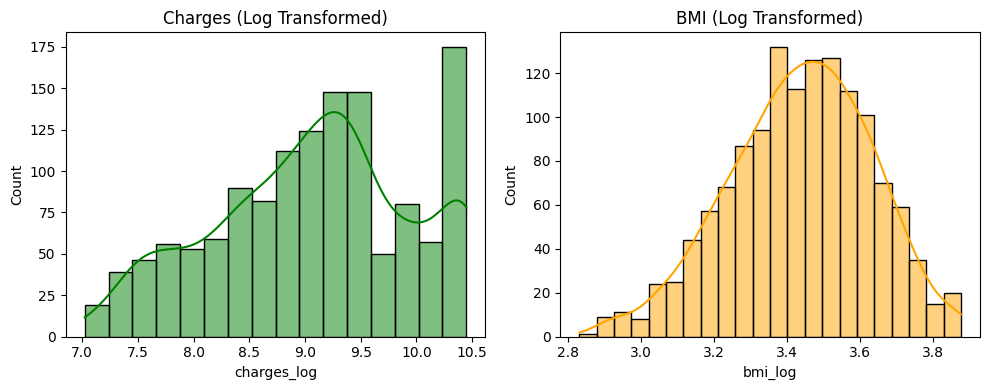


Skewness reduced using log transformation.


In [20]:
#Visualize distributions after log transform
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_transformed["charges_log"], kde=True, color="green")
plt.title("Charges (Log Transformed)")

plt.subplot(1,2,2)
sns.histplot(df_transformed["bmi_log"], kde=True, color="orange")
plt.title("BMI (Log Transformed)")
plt.tight_layout()
plt.show()
print("\nSkewness reduced using log transformation.")

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


In [22]:
X = df_encoded.drop("charges", axis=1)   
y = df_encoded["charges"]                
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVR (RBF Kernel)": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42)
}

In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, rmse])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE", "RMSE"])
print("\nModel Comparison:\n")
print(results_df.sort_values(by="R2 Score", ascending=False))


Model Comparison:

               Model  R2 Score          MAE          RMSE
5  Gradient Boosting  0.846824  2182.985301   4077.771254
2      Random Forest  0.833899  2219.909955   4246.331719
0  Linear Regression  0.784100  3316.732530   4841.211449
6           AdaBoost  0.778976  3764.346263   4898.326814
1      Decision Tree  0.697341  2583.175586   5731.979429
4      KNN Regressor  0.214012  6560.523156   9237.108006
3   SVR (RBF Kernel) -0.057489  7758.368978  10714.350300


In [25]:
# Model Evaluation & Overfitting Check
def adjusted_r2(r2, n, p):
    """Calculate Adjusted R² Score"""
    return 1 - ((1-r2) * (n-1)) / (n-p-1)

results_detailed = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])

    # Test metrics
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], X_test.shape[1])

    results_detailed.append([
        name,
        r2_train, adj_r2_train, mae_train, mse_train, rmse_train,
        r2_test, adj_r2_test, mae_test, mse_test, rmse_test
    ])

# Create DataFrame
eval_df = pd.DataFrame(results_detailed, columns=[
    "Model",
    "Train R2", "Train Adj R2", "Train MAE", "Train MSE", "Train RMSE",
    "Test R2", "Test Adj R2", "Test MAE", "Test MSE", "Test RMSE"
])

print("\n Detailed Model Evaluation:\n")
print(eval_df.sort_values(by="Test R2", ascending=False))



 Detailed Model Evaluation:

               Model  Train R2  Train Adj R2    Train MAE     Train MSE  \
5  Gradient Boosting  0.868065      0.867070  1973.563313  1.341861e+07   
2      Random Forest  0.966379      0.966126   974.699241  3.419454e+06   
0  Linear Regression  0.737639      0.735661  3394.809080  2.668380e+07   
6           AdaBoost  0.779631      0.777969  3638.875253  2.241293e+07   
1      Decision Tree  0.997599      0.997580    29.572515  2.442396e+05   
4      KNN Regressor  0.413973      0.409554  5519.348636  5.960270e+07   
3   SVR (RBF Kernel) -0.086812     -0.095007  7466.587484  1.105357e+08   

     Train RMSE   Test R2  Test Adj R2     Test MAE      Test MSE  \
5   3663.142390  0.846824     0.842093  2182.985301  1.662822e+07   
2   1849.176471  0.833899     0.828769  2219.909955  1.803133e+07   
0   5165.636185  0.784100     0.777431  3316.732530  2.343733e+07   
6   4734.229809  0.778976     0.772149  3764.346263  2.399361e+07   
1    494.205984  0.69734

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest 
rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rand_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=5,          # only 5 random combos (fast)
    cv=3,              # 3-fold cross validation
    n_jobs=-1,
    scoring="r2",
    random_state=42
)
rand_rf.fit(X_train, y_train)
print("Best RF Params:", rand_rf.best_params_)
print("Best RF CV Score:", rand_rf.best_score_)
# Evaluate on test set
rf_best = rand_rf.best_estimator_
print("Random Forest Test R2:", r2_score(y_test, rf_best.predict(X_test)))

Best RF Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Best RF CV Score: 0.8067218276063407
Random Forest Test R2: 0.847124465756616


In [27]:
# Gradient Boosting (Fast Tuning)
gb = GradientBoostingRegressor(random_state=42)
param_dist_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "min_samples_split": [2, 5]
}

rand_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=5,          # only 5 random combos
    cv=3,
    n_jobs=-1,
    scoring="r2",
    random_state=42
)

rand_gb.fit(X_train, y_train)
print(" Best GB Params:", rand_gb.best_params_)
print("Best GB CV Score:", rand_gb.best_score_)
# Evaluate on test set
gb_best = rand_gb.best_estimator_
print("Gradient Boosting Test R2:", r2_score(y_test, gb_best.predict(X_test)))

 Best GB Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.05}
Best GB CV Score: 0.8119374810039064
Gradient Boosting Test R2: 0.847282743409588


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# -------------------------------
# Baseline Models (No tuning)
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# -------------------------------
# Random Forest (Tuned)
# -------------------------------
rf = RandomForestRegressor(random_state=42)

param_dist_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rand_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=5,      # fast search
    cv=3,
    n_jobs=-1,
    scoring="r2",
    random_state=42
)

rand_rf.fit(X_train, y_train)
rf_best = rand_rf.best_estimator_
print("✅ Best RF Params:", rand_rf.best_params_)

# -------------------------------
# Gradient Boosting (Tuned)
# -------------------------------
gb = GradientBoostingRegressor(random_state=42)

param_dist_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4],
    "min_samples_split": [2, 5]
}

rand_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=5,
    cv=3,
    n_jobs=-1,
    scoring="r2",
    random_state=42
)

rand_gb.fit(X_train, y_train)
gb_best = rand_gb.best_estimator_
print("✅ Best GB Params:", rand_gb.best_params_)

# -------------------------------
# Evaluation Function
# -------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    overfit = "Y" if (train_r2 - test_r2) > 0.1 else "N"

    results.append({
        "Model": name,
        "Train RMSE": round(train_rmse, 2),
        "Test RMSE": round(test_rmse, 2),
        "Train R²": round(train_r2, 3),
        "Test R²": round(test_r2, 3),
        "Overfitting (Y/N)": overfit
    })
    return results


# Compare All Models

results = []
results = evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test, results)
results = evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test, results)
results = evaluate_model("Random Forest (Tuned)", rf_best, X_train, y_train, X_test, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", gb_best, X_train, y_train, X_test, y_test, results)

comparison_df = pd.DataFrame(results)


# Identify Best Model (highest Test R²)

best_model_idx = comparison_df["Test R²"].idxmax()
best_model_row = comparison_df.loc[best_model_idx].copy()

# Create a new row for the best model
best_model_row["Model"] = " Best Model: " + best_model_row["Model"]

# Append the new row to the dataframe
comparison_df = pd.concat([comparison_df, pd.DataFrame([best_model_row])], ignore_index=True)


# Display in Jupyter (Pretty Table)

from IPython.display import display

display(
    comparison_df.style.set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


# Export Option (Excel & CSV)

comparison_df.to_excel("model_comparison.xlsx", index=False)
comparison_df.to_csv("model_comparison.csv", index=False)




✅ Best RF Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
✅ Best GB Params: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.05}


,Model,Train RMSE,Test RMSE,Train R²,Test R²,Overfitting (Y/N)
0,Linear Regression,5165.640000,4841.210000,0.738000,0.784000,N
1,Decision Tree,494.210000,5731.980000,0.998000,0.697000,Y
2,Random Forest (Tuned),3920.180000,4073.770000,0.849000,0.847000,N
3,Gradient Boosting (Tuned),3956.190000,4071.660000,0.846000,0.847000,N
4,Best Model: Random Forest (Tuned),3920.180000,4073.770000,0.849000,0.847000,N
